In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('laptop_price.csv', encoding = 'latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data cleaning

In [3]:
df.drop('laptop_ID', axis=1, inplace=True)
df.drop('Product', axis=1, inplace =True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [4]:
df.isna().sum() #Detect missing values

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [5]:
df.duplicated().sum()

29

In [6]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [8]:
df['resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['screentype'] = df['ScreenResolution'].replace(r'(\d+x\d+|Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)

df.drop('ScreenResolution', axis=1, inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,screentype,touchscreen
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPS Panel Retina Display,0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPS Panel Retina Display,0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPS Panel Retina Display,0


In [10]:
df['screentype'].value_counts()

screentype
                             547
                             295
IPS Panel                    261
                              75
IPS Panel                     68
IPS Panel Retina Display      17
IPS Panel                     11
Name: count, dtype: int64

In [11]:
df.drop('screentype', axis=1, inplace=True)

In [12]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [13]:
df['cpu_freq(GHz)'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)')
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].str.replace('GHz', '').astype(float)

df['Cpu']= df['Cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [14]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U      193
Intel Core i7 7700HQ     147
Intel Core i7 7500U      133
Intel Core i3 6006U       81
Intel Core i7 8550U       73
                        ... 
Intel Core M m3            1
AMD E-Series E2-9000       1
Intel Core M M3-6Y30       1
AMD A6-Series 7310         1
AMD A9-Series 9410         1
Name: count, Length: 93, dtype: int64

In [15]:
df['cpu_brand'] = df['Cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()

cpu_brand
Intel      1213
AMD          60
Samsung       1
Name: count, dtype: int64

In [16]:
df[df['cpu_brand']=='Samsung']

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,659.0,2400x1600,0,2.0,Samsung


In [17]:
df=df.drop(1191)

In [18]:
def fetch_processor(x):
    cpu_name=" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
df['cpu_brand']=df['Cpu'].apply(lambda x:fetch_processor(x))

In [19]:
df.drop('Cpu', axis=1, inplace=True)

In [20]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,1.8,Intel Core i5
2,HP,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,0,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,0,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,0,3.1,Intel Core i5


In [21]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df.rename(columns={'Ram': 'Ram(GB)'}, inplace=True)
df['Ram(GB)'] = df['Ram(GB)'].astype(int)

In [22]:
df.head()

,Company,TypeName,Inches,Ram(GB),Memory,Gpu,OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,2.3,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,1.8,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,0,2.5,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,0,2.7,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,0,3.1,Intel Core i5


In [23]:
ssd=df['Memory'].apply(lambda x:x.split('SSD')[0].split('Flash')[0] if 'SSD' in str(x) or 'Flash' in str(x) else x)
ssd=ssd.apply(lambda x:x.replace('GB','') if 'GB' in str(x) else x.replace('TB','') if 'TB' in str(x) else x)
ssd=ssd.apply(pd.to_numeric,errors='coerce')
ssd=ssd.apply(lambda x:x if x>10 else x*1024)
df['SSD']=ssd.fillna(0)


hdd=df['Memory'].apply(lambda x:x.split('HDD')[0].split('Hybrid')[0] if ('HDD' in str(x) and '+' not in str(x)) or ('Hybrid' in str(x) and '+' not in str(x))else
                   x.split('+')[-1].split('HDD')[0].split('Hybrid')[0] if '+' in str(x) else x)
hdd=hdd.apply(lambda x:x.replace('GB','') if 'GB' in str(x) else x.replace('TB','') if 'TB' in str(x) else x)
hdd=hdd.apply(pd.to_numeric,errors='coerce')
hdd=hdd.apply(lambda x:x if x>10 else x*1024)
df['HDD']=hdd.fillna(0)

df=df.drop(columns='Memory')

In [24]:
df.head()

,Company,TypeName,Inches,Ram(GB),Gpu,OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,0,2.3,Intel Core i5,128.0,0.0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,0,1.8,Intel Core i5,128.0,0.0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,0,2.5,Intel Core i5,256.0,0.0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,0,2.7,Intel Core i7,512.0,0.0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,0,3.1,Intel Core i5,256.0,0.0


In [25]:
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

In [26]:
df["gpu_model"] = df['Gpu'].str.extract(r'^(\w+)')

In [27]:
df['gpu_brand'] = df['Gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

In [28]:
df["gpu_model"] = df['Gpu'].apply(lambda x: x.split()[-1])
df["gpu_model"] = df["gpu_model"].str.replace(r'[^0-9]', '', regex=True)
df["gpu_model"] = df["gpu_model"].replace('', '0').astype(int)

In [29]:
df.drop("Gpu", axis=1, inplace=True)

In [30]:
df.head()

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_model,gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560x1600,0,2.3,Intel Core i5,128.0,0.0,640,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440x900,0,1.8,Intel Core i5,128.0,0.0,6000,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920x1080,0,2.5,Intel Core i5,256.0,0.0,620,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880x1800,0,2.7,Intel Core i7,512.0,0.0,455,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560x1600,0,3.1,Intel Core i5,256.0,0.0,650,Intel


# Data Analysis

C:\Users\das-s\AppData\Local\Temp\ipykernel_25028\1256659789.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Company', y='Price_euros', data=df[df['Company'].isin(company_list)], palette='Spectral', errorbar=('ci', False),)


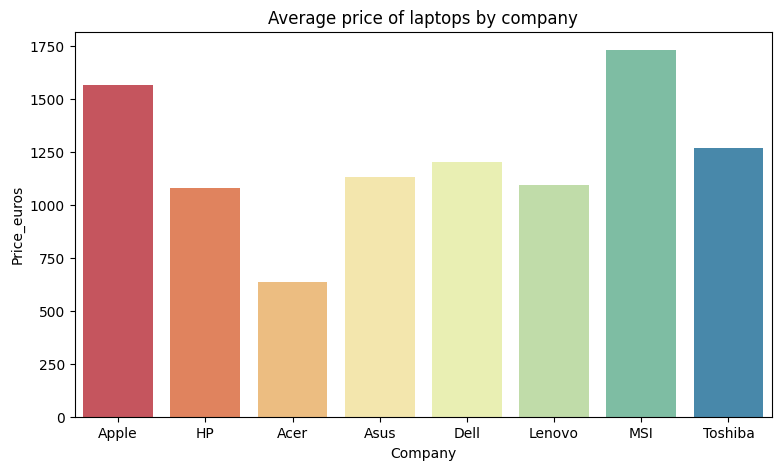

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

company_list = df['Company'].value_counts().index[:8].tolist()

plt.figure(figsize=(9,5))
ax=sns.barplot(x='Company', y='Price_euros', data=df[df['Company'].isin(company_list)], palette='Spectral', errorbar=('ci', False),)
plt.title('Average price of laptops by company')
plt.show()

C:\Users\das-s\AppData\Local\Temp\ipykernel_25028\333696910.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='cpu_brand', y='Price_euros', data=df[df['cpu_brand'].isin(cpu_list)], palette='Spectral', errorbar=('ci', False),)


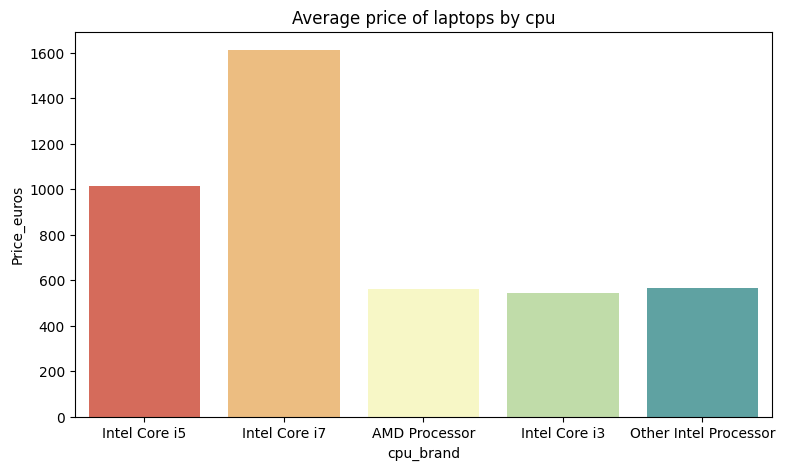

In [32]:
cpu_list = df['cpu_brand'].value_counts().index[:8].tolist()

plt.figure(figsize=(9,5))
ax=sns.barplot(x='cpu_brand', y='Price_euros', data=df[df['cpu_brand'].isin(cpu_list)], palette='Spectral', errorbar=('ci', False),)
plt.title('Average price of laptops by cpu')
plt.show()

<Axes: xlabel='HDD'>

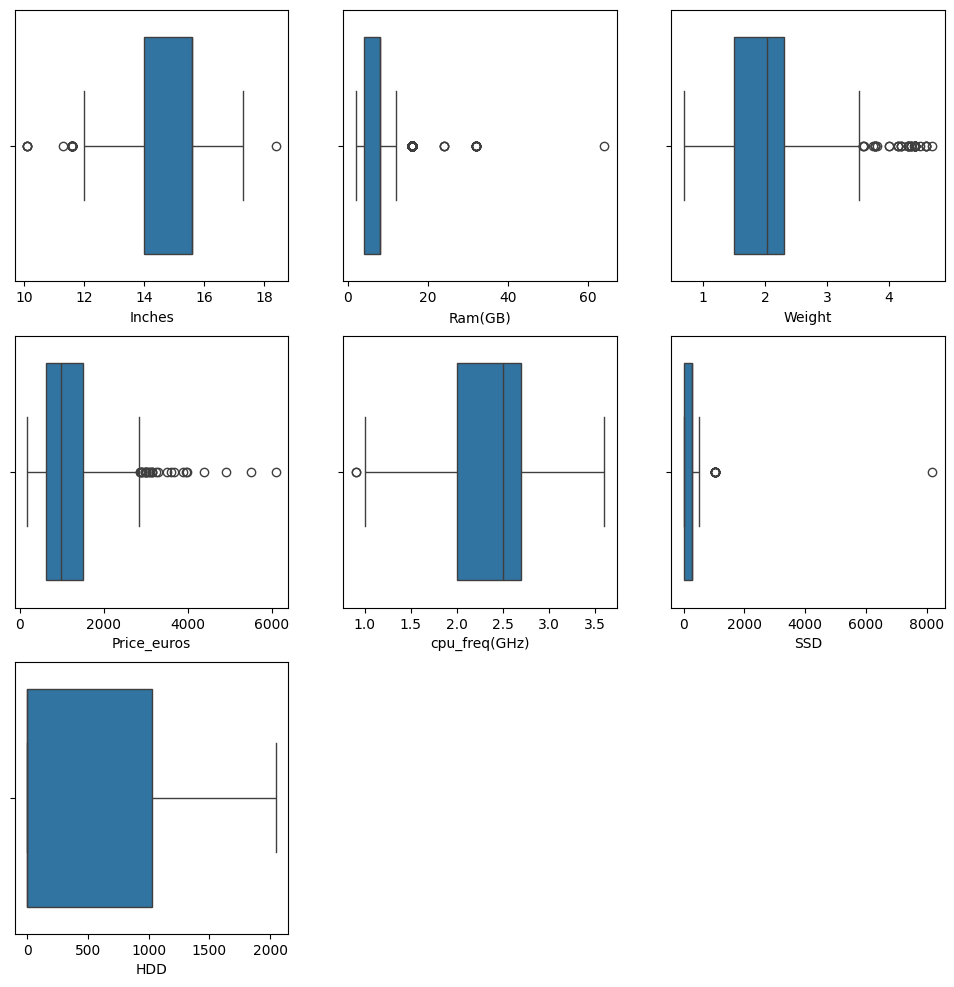

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(3, 3, 1)
sns.boxplot(data=df, x='Inches')

plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='Ram(GB)')

plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='Weight')

plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='Price_euros')

plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='cpu_freq(GHz)')

plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='SSD')

plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='HDD')

In [34]:
df[df['Ram(GB)'] > 60]

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_model,gpu_brand
1066,Asus,Gaming,17.3,64,Windows 10,3.58,3975.0,1920x1080,0,2.7,Intel Core i7,1024.0,0.0,980,Nvidia


In [35]:
df[df['SSD'] > 8000]

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_model,gpu_brand
950,HP,Workstation,15.6,8,Windows 10,2.0,2249.0,1920x1080,0,2.7,Intel Core i7,8192.0,0.0,1000,Nvidia


<Axes: xlabel='SSD'>

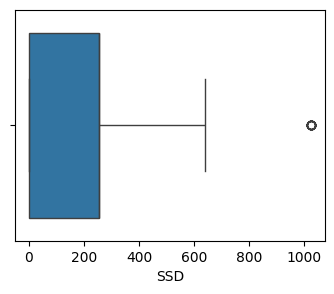

In [36]:
def count_whisker(data, column):
    q1 = data[column].quantile(0.25) # Определение 25% процентиль
    q3 = data[column].quantile(0.75) # Определение 75% процентиль
    iqr = q3 - q1 # Определение размера ящика
    lower_whisker = q1 - 1.5 * iqr # Определение нижнего усика
    upper_whisker = q3 + 1.5 * iqr # Определение верхнего усика
    return lower_whisker, upper_whisker
    
df['SSD'].replace([8192.0], count_whisker(df, 'SSD')[1], inplace=True)

plt.figure(figsize=(4, 3))
sns.boxplot(data=df, x='SSD')

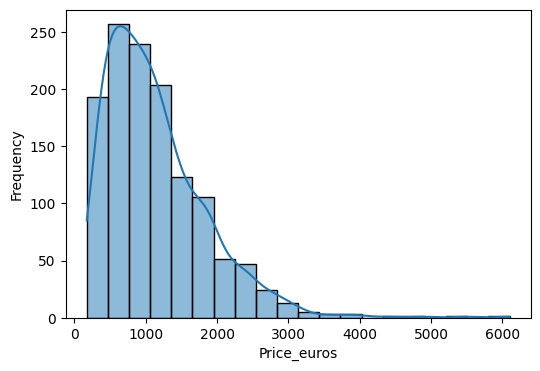

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(df["Price_euros"], kde=True, bins=20)
plt.xlabel("Price_euros")
plt.ylabel("Frequency")
plt.show()

# Data preprocessing

In [38]:
df.head()

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,resolution,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_model,gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560x1600,0,2.3,Intel Core i5,128.0,0.0,640,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440x900,0,1.8,Intel Core i5,128.0,0.0,6000,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920x1080,0,2.5,Intel Core i5,256.0,0.0,620,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880x1800,0,2.7,Intel Core i7,512.0,0.0,455,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560x1600,0,3.1,Intel Core i5,256.0,0.0,650,Intel


In [39]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [40]:
#finding the x_res and y_res from screen resolution 
df['x_res']=df['resolution'].apply(lambda x:x.split()[-1].split('x')[0])
df['y_res']=df['resolution'].apply(lambda x:x.split()[-1].split('x')[1])
#convert to numeric
df['x_res']=df['x_res'].astype('int')
df['y_res']=df['y_res'].astype('int')

In [41]:
df.drop('resolution', axis=1, inplace=True)
df.head()

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_model,gpu_brand,x_res,y_res
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,0,2.3,Intel Core i5,128.0,0.0,640,Intel,2560,1600
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,0,1.8,Intel Core i5,128.0,0.0,6000,Intel,1440,900
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,2.5,Intel Core i5,256.0,0.0,620,Intel,1920,1080
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,0,2.7,Intel Core i7,512.0,0.0,455,AMD,2880,1800
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,0,3.1,Intel Core i5,256.0,0.0,650,Intel,2560,1600


In [42]:
df['gpu_model'].value_counts()

gpu_model
620     355
520     201
1050     71
0        64
940      54
       ... 
7         1
5130      1
555       1
455       1
360       1
Name: count, Length: 62, dtype: int64

In [43]:
df.drop('gpu_model', axis=1, inplace=True)

In [44]:
df['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [45]:
def get_os(a):
    if a=='Windows 10'or a=='Windows 10 S'or a=='Windows 7':
        return 'Windows'
    elif a=='macOS'or a=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['OpSys']=df['OpSys'].apply(get_os) 

In [46]:
from sklearn.preprocessing import LabelEncoder

cols=['Company','TypeName','OpSys','cpu_brand','gpu_brand']

la= LabelEncoder()
for i in cols:
    df[i] = la.fit_transform(df[i])
df.head()

,Company,TypeName,Inches,Ram(GB),OpSys,Weight,Price_euros,touchscreen,cpu_freq(GHz),cpu_brand,SSD,HDD,gpu_brand,x_res,y_res
0,1,4,13.3,8,0,1.37,1339.69,0,2.3,2,128.0,0.0,1,2560,1600
1,1,4,13.3,8,0,1.34,898.94,0,1.8,2,128.0,0.0,1,1440,900
2,7,3,15.6,8,1,1.86,575.00,0,2.5,2,256.0,0.0,1,1920,1080
3,1,4,15.4,16,0,1.83,2537.45,0,2.7,3,512.0,0.0,0,2880,1800
4,1,4,13.3,8,0,1.37,1803.60,0,3.1,2,256.0,0.0,1,2560,1600


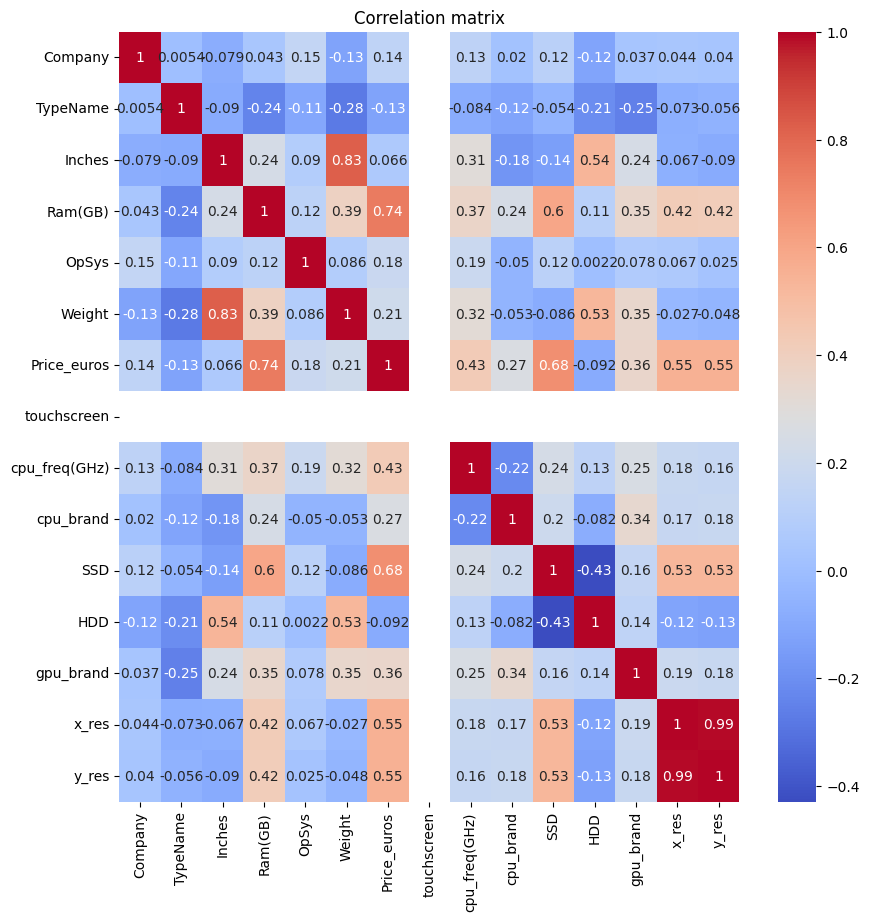

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [48]:
df["ScreenResolution"]=(df["x_res"]*df["y_res"]).astype(float)
df.drop('x_res', axis=1, inplace=True)
df.drop('y_res', axis=1, inplace=True)

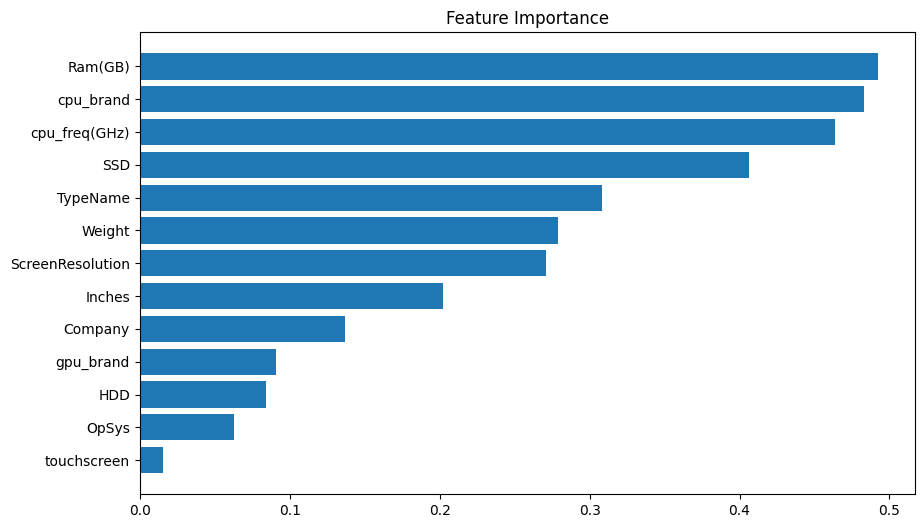

In [49]:
from sklearn.feature_selection import mutual_info_regression

x = df.drop('Price_euros', axis=1)
y = df['Price_euros']
# Вычисление важности признаков с использованием mutual information на ваших данных X_train и y_train 
mutual_info = mutual_info_regression(x, y, random_state=42)
# Создание DataFrame для отображения результатов
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': mutual_info})
# Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance')
plt.show()


In [50]:
df.drop('touchscreen', axis=1, inplace=True)

In [51]:
x = df.drop('Price_euros', axis=1)
y = df['Price_euros']

# Model creation

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [53]:
x_train_scaled = x_train.loc[:, ['Inches', 'Ram(GB)', 'Weight', 'cpu_freq(GHz)', 'SSD', 'HDD', 'ScreenResolution']]
x_test_scaled = x_test.loc[:, ['Inches', 'Ram(GB)', 'Weight', 'cpu_freq(GHz)', 'SSD', 'HDD', 'ScreenResolution']]

In [54]:
# Compute the mean and standard deviation of the training set then transform it
scaler_linear = StandardScaler().fit(x_train_scaled)
x_train_scaled = scaler_linear.transform(x_train_scaled)
x_test_scaled = scaler_linear.transform(x_test_scaled)
x_train = np.concatenate((x_train_scaled, x_train.drop(['Inches', 'Ram(GB)', 'Weight', 'cpu_freq(GHz)', 'SSD', 'HDD', 'ScreenResolution'], axis=1).to_numpy()), axis=1)
x_test = np.concatenate((x_test_scaled, x_test.drop(['Inches', 'Ram(GB)', 'Weight', 'cpu_freq(GHz)', 'SSD', 'HDD', 'ScreenResolution'], axis=1).to_numpy()), axis=1)

In [55]:
result = pd.DataFrame({'Model':[], 'Accuracy':[], 'MSE':[], 'MAE':[], 'R2':[]})

In [56]:
def test_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Feed the scaled training set and get the predictions
    y_hat = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    test_mse = mean_squared_error(y_test, y_hat)
    test_mae = mean_absolute_error(y_test, y_hat)
    test_r2 = r2_score(y_test, y_hat)
    return accuracy, test_mse, test_mae, test_r2

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = []
linear = LinearRegression()
decision_tree = DecisionTreeRegressor()
rendom_forest = RandomForestRegressor()
svr = SVR()
k_neighbors = KNeighborsRegressor()
mlp = MLPRegressor()
gradient_boosting = GradientBoostingRegressor()
models.append(linear)
models.append(decision_tree)
models.append(rendom_forest)
models.append(svr)
models.append(k_neighbors)
models.append(mlp)
models.append(gradient_boosting)

for model in models:
    accuracy, test_mse, test_mae, test_r2 = test_model(model, x_train, y_train, x_test, y_test)
    result.loc[len(result.index)] = [str(model), accuracy, test_mse, test_mae, test_r2] 



c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
result.sort_values(by=['MSE', 'MAE'])

,Model,Accuracy,MSE,MAE,R2
6,GradientBoostingRegressor(),0.839624,97931.235328,219.083712,0.839624
2,RandomForestRegressor(),0.838865,98394.738722,205.224712,0.838865
1,DecisionTreeRegressor(),0.779420,134694.138969,246.710092,0.779420
4,KNeighborsRegressor(),0.766057,142854.484431,241.931129,0.766057
0,LinearRegression(),0.755207,149479.889477,281.897349,0.755207
5,MLPRegressor(),0.529240,287463.383206,383.954314,0.529240
3,SVR(),-0.030171,629060.713978,552.032869,-0.030171


In [59]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [61]:
x_train = torch.tensor(x_train).float().to(device)
x_test = torch.tensor(x_test).float().to(device)
y_train = torch.tensor(y_train.to_numpy()).float().to(device)
y_test = torch.tensor(y_test.to_numpy()).float().to(device)

In [106]:
class NN(nn.Module):
    def __init__(self, input):
        super(NN, self).__init__()
        self.fc1 = nn.Sequential(nn.Linear(input, round(input)),
                                 nn.ReLU(),
                                 nn.Linear(round(input), round(input / 2)),
                                 nn.ReLU(),
                                 nn.Linear(round(input / 2), round(input / 2)),
                                 nn.ReLU(),
                                 nn.Linear(round(input / 2), round(input / 4)),
                                 nn.ReLU(),
                                 nn.Linear(round(input / 4), 1))

    def forward(self, x):
        x = self.fc1(x)
        return x

In [107]:
model_nn = NN(len(x_train[0]))
model_nn.to(device)

NN(
  (fc1): Sequential(
    (0): Linear(in_features=12, out_features=12, bias=True)
    (1): ReLU()
    (2): Linear(in_features=12, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=6, bias=True)
    (5): ReLU()
    (6): Linear(in_features=6, out_features=3, bias=True)
    (7): ReLU()
    (8): Linear(in_features=3, out_features=1, bias=True)
  )
)

In [108]:
optimizer = Adam(params=model_nn.parameters(), lr=1e-3)
loss_func = nn.MSELoss()

In [109]:
num_iter = 1000
losses = []
train_loop = tqdm(range(num_iter))
train_loop.set_description_str("Model training")
for i in train_loop:
    outputs = model_nn(x_train)
    loss = loss_func(outputs, y_train)
    losses.append(loss.item())
    train_loop.set_postfix_str(f"Current error = {loss.item()}")
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

Model training:   0%|          | 0/1000 [00:00<?, ?it/s]c:\Users\das-s\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1018])) that is different to the input size (torch.Size([1018, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Model training: 100%|██████████| 1000/1000 [00:02<00:00, 421.66it/s, Current error = 485107.09375]


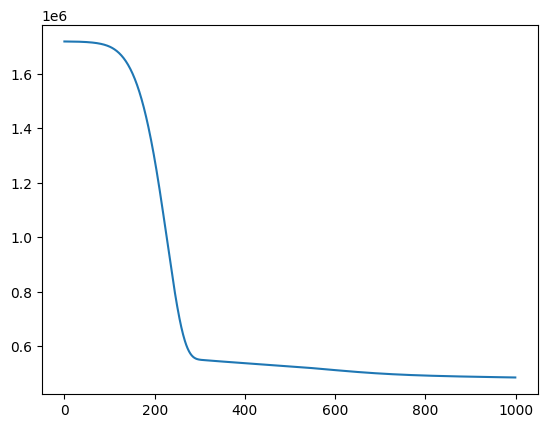

In [110]:
plt.plot(losses)

In [114]:
import random 
j = random.randint(0, len(y_test))

print(f"\nReal price = {y_test[j].item()}")
print(f"Predicted price = {model_nn(x_test[j]).item()}")


Real price = 1109.0
Predicted price = 1212.18212890625


In [115]:
results = model_nn(x_test).cpu().detach().numpy()
y_real = y_test.cpu().detach().numpy()
mse = mean_squared_error(y_real, results)
mae = mean_absolute_error(y_real, results)

print(f"mse =\t{mse}\nmae =\t{mae}")

mse =	639002.875
mae =	566.251708984375
